In [101]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
from matplotlib.ticker import ScalarFormatter
from matplotlib.ticker import FuncFormatter
from scipy.stats import chi2_contingency


In [102]:
# Import first data frame 
df_final_demo= pd.read_csv("data/df_final_demo.txt")
df_final_demo

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0
...,...,...,...,...,...,...,...,...,...
70604,7993686,4.0,56.0,38.5,U,3.0,1411062.68,5.0,5.0
70605,8981690,12.0,148.0,31.0,M,2.0,101867.07,6.0,6.0
70606,333913,16.0,198.0,61.5,F,2.0,40745.00,3.0,3.0
70607,1573142,21.0,255.0,68.0,M,3.0,475114.69,4.0,4.0


histogram of head and tail of final demo

Step 1 : Data Exploration

In [103]:
# Display basic information about the dataset
display(df_final_demo.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70609 entries, 0 to 70608
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   client_id         70609 non-null  int64  
 1   clnt_tenure_yr    70595 non-null  float64
 2   clnt_tenure_mnth  70595 non-null  float64
 3   clnt_age          70594 non-null  float64
 4   gendr             70595 non-null  object 
 5   num_accts         70595 non-null  float64
 6   bal               70595 non-null  float64
 7   calls_6_mnth      70595 non-null  float64
 8   logons_6_mnth     70595 non-null  float64
dtypes: float64(7), int64(1), object(1)
memory usage: 4.8+ MB


None

In [104]:
df_final_demo['clnt_tenure_yr'].value_counts() # Understanding data set and value count in clnt_tenure_yr

clnt_tenure_yr
6.0     7092
5.0     6955
7.0     4955
4.0     4687
15.0    4564
8.0     4045
14.0    3646
12.0    3631
13.0    3607
9.0     3357
11.0    2920
10.0    2775
16.0    2714
21.0    2257
20.0    1580
22.0    1492
17.0    1373
23.0    1279
18.0    1206
19.0    1153
24.0     846
26.0     660
27.0     632
28.0     507
25.0     484
3.0      449
29.0     309
30.0     303
33.0     206
32.0     191
34.0     175
31.0     166
35.0     102
2.0       81
36.0      36
37.0      35
38.0      33
48.0      16
39.0       9
40.0       9
55.0       9
50.0       8
47.0       6
43.0       6
42.0       6
46.0       5
51.0       5
49.0       4
44.0       3
52.0       2
54.0       1
41.0       1
45.0       1
62.0       1
Name: count, dtype: int64

<Axes: xlabel='clnt_tenure_yr', ylabel='Count'>

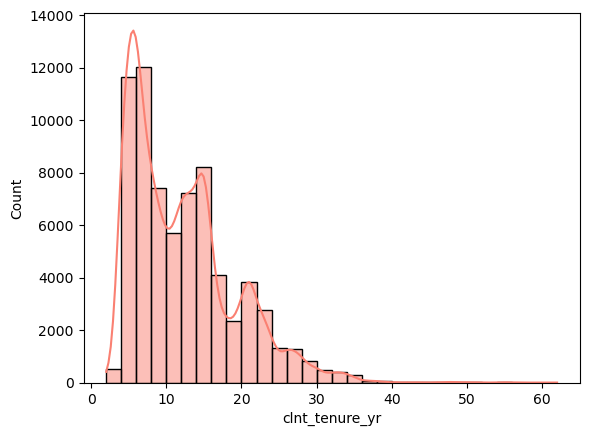

In [105]:
#Plotting a histogram for the 'clnt_tenure_yr' column 
sns.histplot(df_final_demo['clnt_tenure_yr'], kde=True, bins=30, color="salmon")

In [106]:
# Analysis in the client data frame
df_final_demo['clnt_age'].value_counts()

clnt_age
58.5    859
55.5    830
29.5    829
28.5    827
57.5    826
       ... 
96.0      2
14.0      2
94.5      1
95.5      1
13.5      1
Name: count, Length: 165, dtype: int64

<Axes: xlabel='clnt_age', ylabel='Count'>

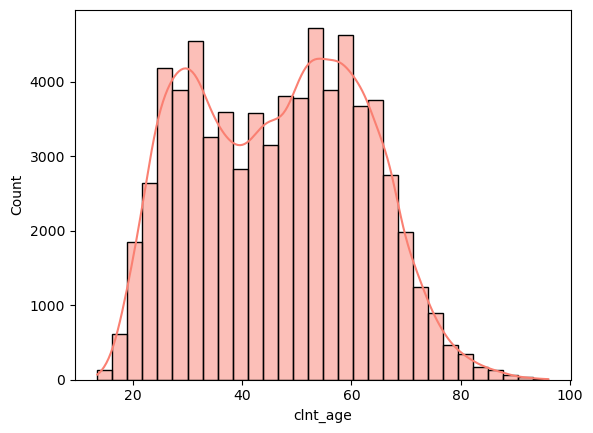

In [107]:
#Plotting a histogram for the 'clnt_age' column 
sns.histplot(df_final_demo['clnt_age'], kde=True, bins=30, color="salmon")

In [108]:
gender= df_final_demo.groupby("gendr")
gender.size() #What are U and X? We need to figure that out.

gendr
F    22746
M    23724
U    24122
X        3
dtype: int64

<Axes: ylabel='count'>

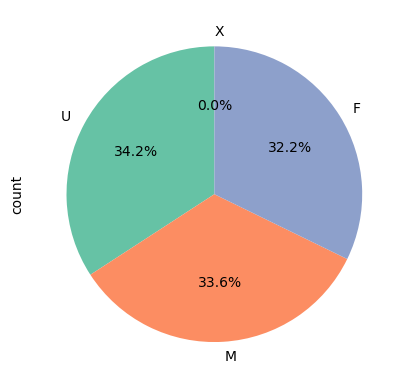

In [109]:
df_final_demo['gendr'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set2"))

In [110]:
df_final_demo['num_accts'].value_counts()

num_accts
2.0    55497
3.0    12529
4.0     2241
5.0      284
6.0       33
7.0        8
1.0        2
8.0        1
Name: count, dtype: int64

<Axes: ylabel='count'>

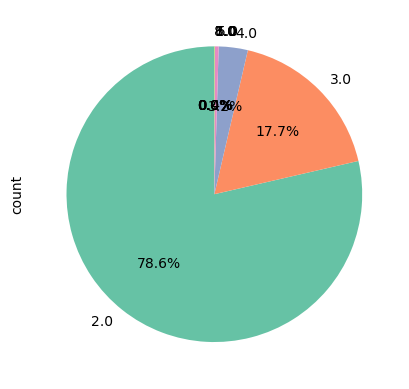

In [111]:
df_final_demo['num_accts'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set2"))

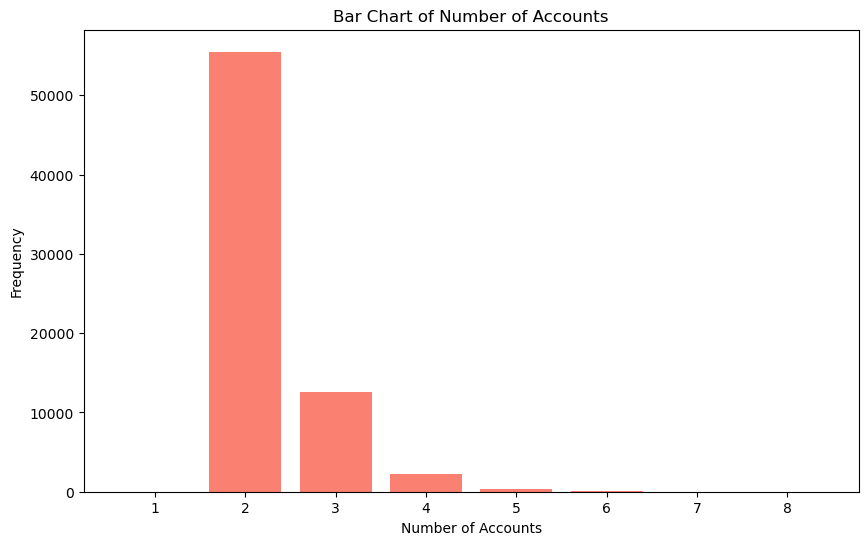

In [112]:
#Plotting a histogram for the 'num_accts' column 
# Assuming df_final_demo is your dataframe and 'num_accts' is your column
num_accts_counts = df_final_demo['num_accts'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.bar(num_accts_counts.index, num_accts_counts.values, color='salmon')
plt.xlabel('Number of Accounts')
plt.ylabel('Frequency')
plt.title('Bar Chart of Number of Accounts')
plt.show()

In [113]:
df_final_demo['bal'].value_counts()

bal
31188.62     5
29388.51     4
31398.74     3
29389.11     3
29388.50     3
            ..
26088.34     1
51203.28     1
94714.11     1
52086.48     1
157498.73    1
Name: count, Length: 70333, dtype: int64

In [114]:
df_final_demo.bal.describe()

count    7.059500e+04
mean     1.474452e+05
std      3.015087e+05
min      1.378942e+04
25%      3.734683e+04
50%      6.333290e+04
75%      1.375449e+05
max      1.632004e+07
Name: bal, dtype: float64

In [115]:
df_final_demo['logons_6_mnth'].value_counts()

logons_6_mnth
9.0    12350
3.0    10243
4.0    10220
7.0     9893
5.0     9254
6.0     7878
8.0     4810
2.0     3009
1.0     2938
Name: count, dtype: int64

<Axes: xlabel='logons_6_mnth', ylabel='Count'>

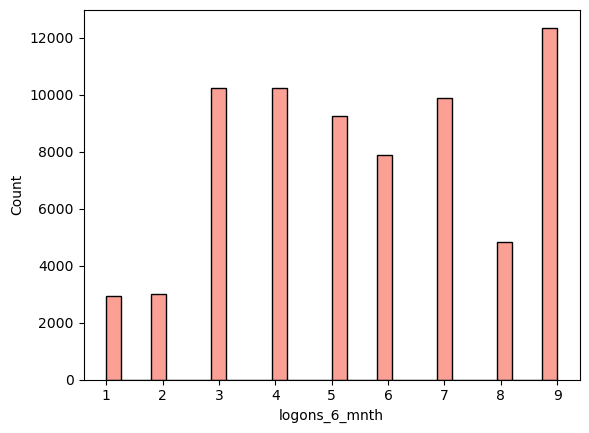

In [116]:
#Plotting a histogram for the 'logons_6_mnth' column 
sns.histplot(df_final_demo['logons_6_mnth'], bins=30, color="salmon")

Analyzing Client Demographics

In [117]:
# Calculate client tenure in months
df_final_demo['total_tenure_months'] = df_final_demo['clnt_tenure_yr'] * 12 + df_final_demo['clnt_tenure_mnth']

In [118]:
# Display the first few rows to inspect the calculation
print(df_final_demo[['client_id', 'clnt_tenure_yr', 'clnt_tenure_mnth', 'total_tenure_months']].head())

   client_id  clnt_tenure_yr  clnt_tenure_mnth  total_tenure_months
0     836976             6.0              73.0                145.0
1    2304905             7.0              94.0                178.0
2    1439522             5.0              64.0                124.0
3    1562045            16.0             198.0                390.0
4    5126305            12.0             145.0                289.0


In [119]:
# Categorize clients as new or long-standing
df_final_demo['client_status'] = np.where(df_final_demo['total_tenure_months'] <= 24, 'New', 'Long-standing')

In [120]:
# Display the first few rows of the dataframe to inspect the new columns
print(df_final_demo[['client_id', 'client_status', 'total_tenure_months']].head())

   client_id  client_status  total_tenure_months
0     836976  Long-standing                145.0
1    2304905  Long-standing                178.0
2    1439522  Long-standing                124.0
3    1562045  Long-standing                390.0
4    5126305  Long-standing                289.0


In [121]:
# Categorize clients as younger or older
df_final_demo['age_group'] = np.where(df_final_demo['clnt_age'] <=df_final_demo['clnt_age'].median(), 'Younger', 'Older')

In [122]:
print(df_final_demo[['client_id', 'clnt_age', 'age_group']].head())

   client_id  clnt_age age_group
0     836976      60.5     Older
1    2304905      58.0     Older
2    1439522      32.0   Younger
3    1562045      49.0     Older
4    5126305      33.0   Younger


In [123]:
df_final_demo["age_group"].value_counts()

age_group
Younger    35527
Older      35082
Name: count, dtype: int64

In [124]:
df_final_demo

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,total_tenure_months,client_status,age_group
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,145.0,Long-standing,Older
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0,178.0,Long-standing,Older
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0,124.0,Long-standing,Younger
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0,390.0,Long-standing,Older
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0,289.0,Long-standing,Younger
...,...,...,...,...,...,...,...,...,...,...,...,...
70604,7993686,4.0,56.0,38.5,U,3.0,1411062.68,5.0,5.0,104.0,Long-standing,Younger
70605,8981690,12.0,148.0,31.0,M,2.0,101867.07,6.0,6.0,292.0,Long-standing,Younger
70606,333913,16.0,198.0,61.5,F,2.0,40745.00,3.0,3.0,390.0,Long-standing,Older
70607,1573142,21.0,255.0,68.0,M,3.0,475114.69,4.0,4.0,507.0,Long-standing,Older


Identify Primary Clients

In [125]:
# Primary clients' demographics
primary_clients = df_final_demo.groupby(['client_status', 'age_group']).size().reset_index(name='count')
print("Primary Clients by Tenure and Age Group:")
print(primary_clients)

Primary Clients by Tenure and Age Group:
   client_status age_group  count
0  Long-standing     Older  35082
1  Long-standing   Younger  35527


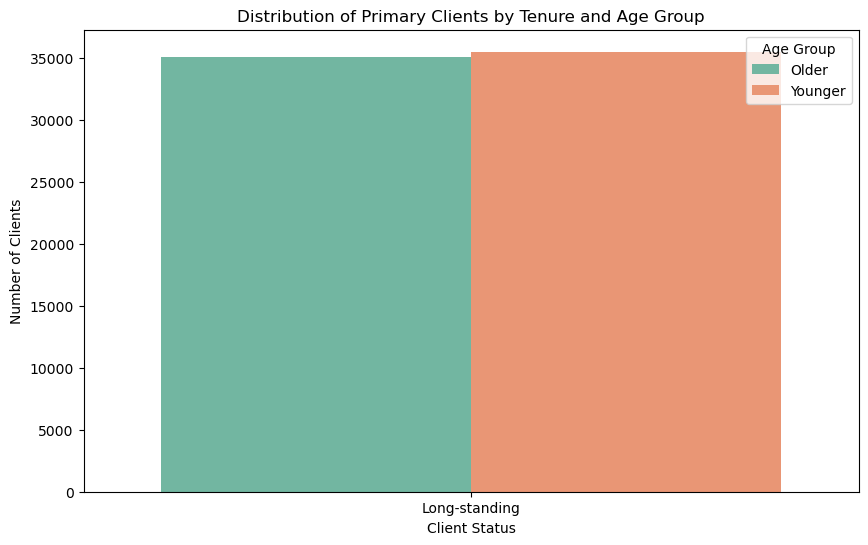

In [126]:
#MAKE A PIE CHART!!!!!! ASAP 

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='client_status', y='count', hue='age_group', data=primary_clients, palette='Set2')

# Adding titles and labels
plt.title('Distribution of Primary Clients by Tenure and Age Group')
plt.xlabel('Client Status')
plt.ylabel('Number of Clients')
plt.legend(title='Age Group')
plt.show()

#Why do we have this code below 

In [127]:
df_final_demo['clnt_age'].mean()

46.442240133722414

# Cleaning df_final_demo 

In [128]:
df_final_demo= pd.read_csv("data/df_final_demo.txt")
df_final_demo


,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0
...,...,...,...,...,...,...,...,...,...
70604,7993686,4.0,56.0,38.5,U,3.0,1411062.68,5.0,5.0
70605,8981690,12.0,148.0,31.0,M,2.0,101867.07,6.0,6.0
70606,333913,16.0,198.0,61.5,F,2.0,40745.00,3.0,3.0
70607,1573142,21.0,255.0,68.0,M,3.0,475114.69,4.0,4.0


In [129]:
null_rows = df_final_demo[df_final_demo["bal"].isnull()]
null_rows

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
4164,7402828,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8316,355337,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8677,8412164,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13444,2222915,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18066,4876926,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25961,5277910,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28432,7616759,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35323,8191345,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
43518,1227228,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46076,8611797,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [130]:
df_final_demo.dropna(subset = "bal", inplace=True) 

In [131]:
df_final_demo.dropna(subset = "clnt_age", inplace=True)

In [132]:
df_final_demo.dtypes # Client id should be an string because it is categorical data

client_id             int64
clnt_tenure_yr      float64
clnt_tenure_mnth    float64
clnt_age            float64
gendr                object
num_accts           float64
bal                 float64
calls_6_mnth        float64
logons_6_mnth       float64
dtype: object

# Cleaning df part 1

In [133]:
df_pt1 = pd.read_csv("data/df_final_web_data_pt_1.txt")
df_pt1

,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04
...,...,...,...,...,...
343136,2443347,465784886_73090545671,136329900_10529659391_316129,confirm,2017-03-31 15:15:46
343137,2443347,465784886_73090545671,136329900_10529659391_316129,step_3,2017-03-31 15:14:53
343138,2443347,465784886_73090545671,136329900_10529659391_316129,step_2,2017-03-31 15:12:08
343139,2443347,465784886_73090545671,136329900_10529659391_316129,step_1,2017-03-31 15:11:37


In [134]:
df_pt1.isna().sum()

client_id       0
visitor_id      0
visit_id        0
process_step    0
date_time       0
dtype: int64

# Clean part 2

In [135]:
df_pt2 = pd.read_csv("data/df_final_web_data_pt_2.txt")
df_pt2

,client_id,visitor_id,visit_id,process_step,date_time
0,763412,601952081_10457207388,397475557_40440946728_419634,confirm,2017-06-06 08:56:00
1,6019349,442094451_91531546617,154620534_35331068705_522317,confirm,2017-06-01 11:59:27
2,6019349,442094451_91531546617,154620534_35331068705_522317,step_3,2017-06-01 11:58:48
3,6019349,442094451_91531546617,154620534_35331068705_522317,step_2,2017-06-01 11:58:08
4,6019349,442094451_91531546617,154620534_35331068705_522317,step_1,2017-06-01 11:57:58
...,...,...,...,...,...
412259,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:46:10
412260,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:45:29
412261,9668240,388766751_9038881013,922267647_3096648104_968866,step_1,2017-05-24 18:44:51
412262,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:44:34


In [136]:
df_pt2.isna().sum()

client_id       0
visitor_id      0
visit_id        0
process_step    0
date_time       0
dtype: int64

In [137]:
#MERGE TWIN DFs
df = pd.concat([df_pt1, df_pt2], axis = 0)
df.sort_values(by="client_id", ascending=True, inplace=True)
df

,client_id,visitor_id,visit_id,process_step,date_time
285512,169,201385055_71273495308,749567106_99161211863_557568,step_3,2017-04-12 20:22:05
285511,169,201385055_71273495308,749567106_99161211863_557568,confirm,2017-04-12 20:23:09
285513,169,201385055_71273495308,749567106_99161211863_557568,step_2,2017-04-12 20:20:31
285514,169,201385055_71273495308,749567106_99161211863_557568,step_1,2017-04-12 20:19:45
285515,169,201385055_71273495308,749567106_99161211863_557568,start,2017-04-12 20:19:36
...,...,...,...,...,...
305392,9999875,738878760_1556639849,931268933_219402947_599432,step_1,2017-06-01 22:40:08
305388,9999875,738878760_1556639849,931268933_219402947_599432,confirm,2017-06-01 22:48:39
305389,9999875,738878760_1556639849,931268933_219402947_599432,step_3,2017-06-01 22:44:58
305391,9999875,738878760_1556639849,931268933_219402947_599432,step_1,2017-06-01 22:41:28


# KPI STARTS HERE (CHANGE IT!)

Analyze Time Spent on Each Step

In [138]:
# Convert date_time to datetime format
df['date_time'] = pd.to_datetime(df['date_time'])

In [139]:
# Sort by visit_id and date_time
df = df.sort_values(by=['visit_id', 'date_time'])

In [140]:
# Calculate time spent on each step
df['time_spent'] = df.groupby('visit_id')['date_time'].diff().dt.total_seconds()

In [141]:
# Fill NaN values in time_spent with 0 for the first step
df['time_spent'] = df['time_spent'].fillna(0)

In [142]:
# Calculate average time spent on each step
time_spent_summary = df.groupby('process_step')['time_spent'].mean().reset_index()
print("Average Time Spent on Each Step:")
print(time_spent_summary)


Average Time Spent on Each Step:
  process_step  time_spent
0      confirm  117.411594
1        start   59.989108
2       step_1   39.122070
3       step_2   45.542942
4       step_3   98.495340


/var/folders/n6/6tdhcx8d7tq5v5rgh8bbvm8c0000gn/T/ipykernel_53792/1623440689.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='process_step', y='time_spent', data=time_spent_summary, palette='viridis')


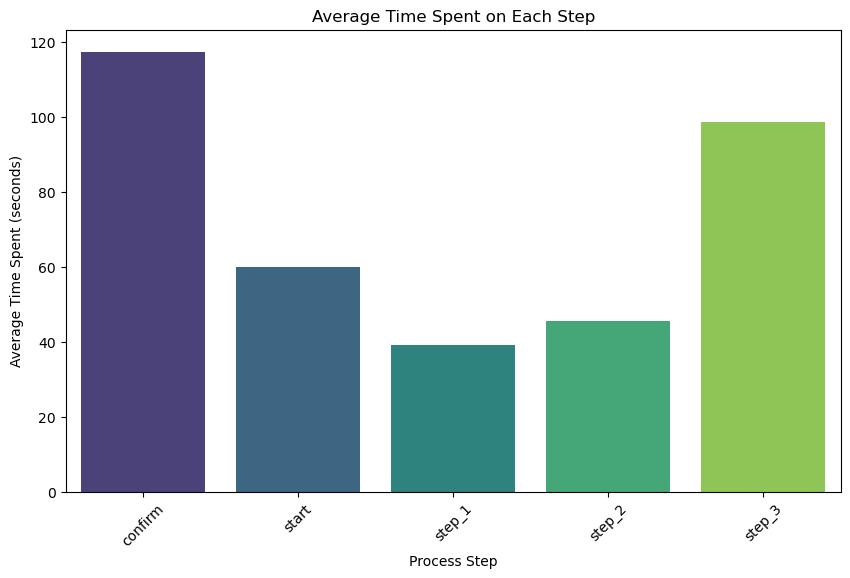

In [143]:
# Plotting the average time spent on each step
plt.figure(figsize=(10, 6))
sns.barplot(x='process_step', y='time_spent', data=time_spent_summary, palette='viridis')

# Adding titles and labels
plt.title('Average Time Spent on Each Step')
plt.xlabel('Process Step')
plt.ylabel('Average Time Spent (seconds)')
plt.xticks(rotation=45)
plt.show()

In [144]:
process_step_counts = df['process_step'].value_counts()
process_step_counts

process_step
start      243945
step_1     163193
step_2     133062
step_3     112242
confirm    102963
Name: count, dtype: int64

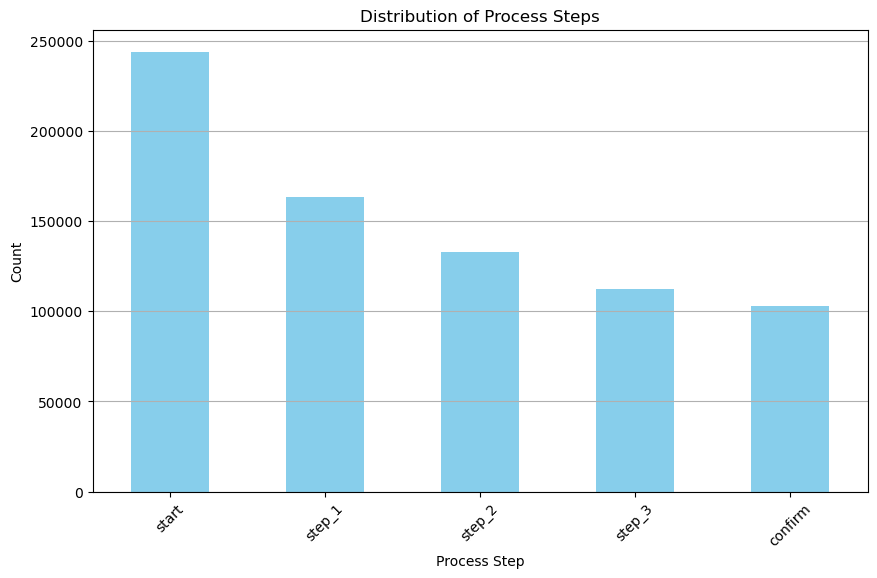

In [145]:
# Count the occurrences of each process step
process_step_counts = df['process_step'].value_counts()

# Plot a bar chart
plt.figure(figsize=(10, 6))
process_step_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Process Steps')
plt.xlabel('Process Step')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Display the plot
plt.show()

In [146]:
df_final_experiment_clients = pd.read_csv("data/df_final_experiment_clients.txt")
df_final_experiment_clients


,client_id,Variation
0,9988021,Test
1,8320017,Test
2,4033851,Control
3,1982004,Test
4,9294070,Control
...,...,...
70604,2443347,NaN
70605,8788427,NaN
70606,266828,NaN
70607,1266421,NaN


In [147]:
variation = df_final_experiment_clients.groupby("Variation")
variation.size()

Variation
Control    23532
Test       26968
dtype: int64

In [148]:
df_final_experiment_clients.isna().sum()

client_id        0
Variation    20109
dtype: int64

# KPI's

In [149]:
new_df = pd.merge(df_final_demo, df, how="left", on = "client_id")

variation_df = pd.merge(new_df, df_final_experiment_clients, on = "client_id", how="inner") # We are using an inner join bc we do not care about client's that did not go thru the process
variation_df.reset_index()
variation_df

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,visitor_id,visit_id,process_step,date_time,time_spent,Variation
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,427070339_1413275162,104438405_2368283624_817211,start,2017-03-29 10:58:35,0.0,Test
1,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,427070339_1413275162,104438405_2368283624_817211,start,2017-03-29 10:59:43,68.0,Test
2,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,427070339_1413275162,104438405_2368283624_817211,start,2017-03-29 11:01:40,117.0,Test
3,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,427070339_1413275162,104438405_2368283624_817211,start,2017-03-29 11:02:44,64.0,Test
4,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,427070339_1413275162,228976764_46825473280_96584,start,2017-04-02 11:21:28,0.0,Test
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449699,5602139,21.0,254.0,59.5,F,3.0,157498.73,7.0,7.0,962766819_57063135389,158544612_4105226940_43043,step_2,2017-04-05 11:43:10,0.0,NaN
449700,5602139,21.0,254.0,59.5,F,3.0,157498.73,7.0,7.0,962766819_57063135389,158544612_4105226940_43043,step_3,2017-04-05 11:44:07,57.0,NaN
449701,5602139,21.0,254.0,59.5,F,3.0,157498.73,7.0,7.0,962766819_57063135389,158544612_4105226940_43043,confirm,2017-04-05 11:48:02,235.0,NaN
449702,5602139,21.0,254.0,59.5,F,3.0,157498.73,7.0,7.0,962766819_57063135389,884309593_49820690623_654151,start,2017-04-05 11:41:04,0.0,NaN


In [150]:
variation_df.dropna(subset="Variation", inplace = True)

In [151]:
# Total number of sessions for each group
total_sessions = variation_df.groupby('Variation')['visit_id'].nunique().reset_index(name='total_sessions')

# Filter the data to only include rows where process_step is "confirm"
confirm_steps = variation_df[variation_df['process_step'] == 'confirm']

# Count the number of sessions that reached the "confirm" step for each group
confirm_sessions = confirm_steps.groupby('Variation')['visit_id'].nunique().reset_index(name='confirm_sessions')

#Merge total sessions with confirm sessions
completion_data = pd.merge(total_sessions, confirm_sessions, on='Variation')

# Calculate the completion rate
completion_data['completion_rate'] = (completion_data['confirm_sessions'] / completion_data['total_sessions']) * 100

print(completion_data)

  Variation  total_sessions  confirm_sessions  completion_rate
0   Control           32181             16039        49.839968
1      Test           37122             21725        58.523248


/var/folders/n6/6tdhcx8d7tq5v5rgh8bbvm8c0000gn/T/ipykernel_53792/1648782325.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Variation', y='completion_rate', data=completion_data, palette='Set2')


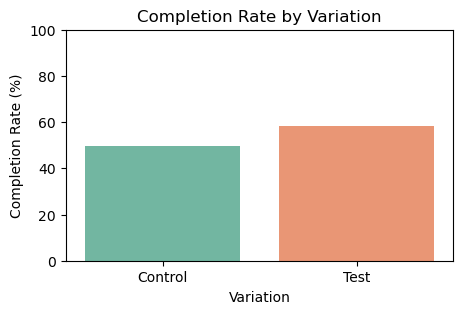

In [152]:
#create a bar chart
plt.figure(figsize=(5, 3))
sns.barplot(x='Variation', y='completion_rate', data=completion_data, palette='Set2')
plt.title('Completion Rate by Variation')
plt.xlabel('Variation')
plt.ylabel('Completion Rate (%)')
plt.ylim(0, 100)
plt.show()

In [153]:
# Calculate the observed increase in completion rate
completion_rate_control = completion_data.loc[completion_data['Variation'] == 'Control', 'completion_rate'].values[0]
completion_rate_test = completion_data.loc[completion_data['Variation'] == 'Test', 'completion_rate'].values[0]
observed_increase = completion_rate_test - completion_rate_control
print(f"Observed Increase in Completion Rate: {observed_increase:.2f}%")

import numpy as np
from scipy.stats import chi2_contingency

confirm_sessions_control = 16046
total_sessions_control = 32189
confirm_sessions_test = 21731
total_sessions_test = 37136

# Create the contingency table
contingency_table = np.array([
    [confirm_sessions_control, total_sessions_control - confirm_sessions_control],
    [confirm_sessions_test, total_sessions_test - confirm_sessions_test]
])

# Perform the chi-squared test
chi2_stat, p_value, _, _ = chi2_contingency(contingency_table)

# Print the test statistic and p-value
print(f"Chi-Squared Statistic: {chi2_stat:.2f}")
print(f"P-Value: {p_value:.4f}")

threshold = 5.0  # 5% threshold
if observed_increase >= threshold and p_value < 0.05:
    print("The observed increase in completion rate meets or exceeds the 5% threshold and is statistically significant.")
else:
    print("The observed increase in completion rate does not meet the 5% threshold or is not statistically significant.")


Observed Increase in Completion Rate: 8.68%
Chi-Squared Statistic: 522.09
P-Value: 0.0000
The observed increase in completion rate meets or exceeds the 5% threshold and is statistically significant.


In [154]:
control_df = variation_df[variation_df["Variation"] == "Control"]
test_df = variation_df[variation_df["Variation"] == "Test"]

Text(0, 0.5, 'Frequency')

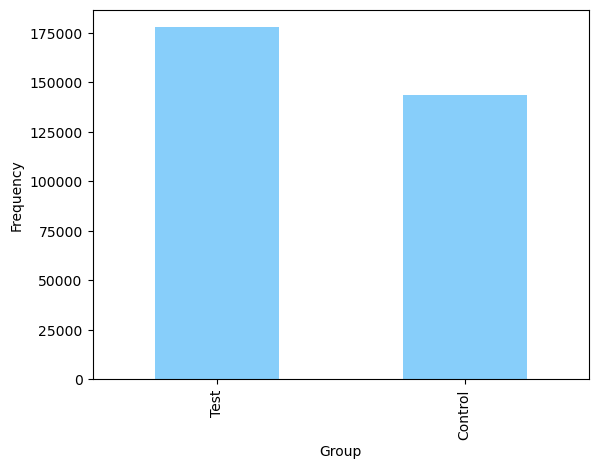

In [155]:
variation_counts = variation_df["Variation"].value_counts()
variation_counts.plot(kind="bar", color = "lightskyblue" )
plt.xlabel("Group")
plt.ylabel("Frequency")

In [156]:
print(control_df.client_id.count(),test_df.client_id.count())

143408 177787


In [157]:
# # Function to calculate time spent on each step
# def calculate_step_duration(df):
#     # Ensure 'date_time' is sorted within each user session
#     df = df.sort_values(by=['client_id', 'visitor_id', 'date_time'])
    
#     # Calculate the time spent on each step by finding the difference between consecutive steps
#     df['next_step_time'] = df.groupby(['client_id', 'visitor_id'])['date_time'].shift(-1)
#     df['time_spent'] = (df['next_step_time'] - df['date_time']).dt.total_seconds()
    
#     # Drop rows where 'time_spent' is NaN (e.g., the last step in each session)
#     df = df.dropna(subset=['time_spent'])
    
#     # Calculate the average duration spent on each step
#     avg_duration_per_step = df.groupby('process_step')['time_spent'].mean().reset_index()
#     avg_duration_per_step.columns = ['process_step', 'avg_duration_seconds']
    
#     return avg_duration_per_step

# # Apply the function
# average_duration_per_step = calculate_step_duration(variation_df)

# # Print the results
# print("Average Duration Spent on Each Step (in seconds):")
# print(average_duration_per_step)

In [158]:
# plt.figure(figsize=(10, 6))
# sns.barplot(x='process_step', y='avg_duration_seconds', data=average_duration_per_step, palette='viridis')
# plt.title('Average Duration Spent on Each Step (in seconds)')
# plt.xlabel('Process Step')
# plt.ylabel('Average Duration (seconds)')
# plt.xticks(rotation=45)
# plt.show()

In [159]:


# # General function to calculate time spent on each step
# def calculate_step_duration(df):
#     # Ensure 'date_time' is sorted within each user session
#     df = df.sort_values(by=['client_id', 'visitor_id', 'date_time'])
    
#     # Calculate the time spent on each step by finding the difference between consecutive steps
#     df['next_step_time'] = df.groupby(['client_id', 'visitor_id'])['date_time'].shift(-1)
#     df['time_spent'] = (df['next_step_time'] - df['date_time']).dt.total_seconds()
    
#     # Drop rows where 'time_spent' is NaN (e.g., the last step in each session)
#     df = df.dropna(subset=['time_spent'])
    
#     # Calculate the average duration spent on each step
#     avg_duration_per_step = df.groupby('process_step')['time_spent'].mean().reset_index()
#     avg_duration_per_step.columns = ['process_step', 'avg_duration_seconds']
    
#     return avg_duration_per_step

# # Apply the function to control and test dataframes
# average_duration_per_step_control = calculate_step_duration(control_df)
# average_duration_per_step_test = calculate_step_duration(test_df)

# # Print the results
# print("Average Duration Spent on Each Step (Control Group) (in seconds):")
# print(average_duration_per_step_control)

# print("Average Duration Spent on Each Step (Test Group) (in seconds):")
# print(average_duration_per_step_test)



In [160]:

# Assuming 'variation_df' is your DataFrame and it includes 'date_time' and 'process_step' columns
control_df = variation_df[variation_df["Variation"] == "Control"]
test_df = variation_df[variation_df["Variation"] == "Test"]

# General function to calculate time spent on each step
def calculate_step_duration(df):
    # Ensure 'date_time' is sorted within each user session
    df = df.sort_values(by=['client_id', 'visitor_id', 'date_time'])
    
    # Calculate the time spent on each step by finding the difference between consecutive steps
    df['next_step_time'] = df.groupby(['client_id', 'visitor_id'])['date_time'].shift(-1)
    df['time_spent'] = (df['next_step_time'] - df['date_time']).dt.total_seconds()
    
    # Drop rows where 'time_spent' is NaN (e.g., the last step in each session)
    df = df.dropna(subset=['time_spent'])
    
    # Calculate the average duration spent on each step
    avg_duration_per_step = df.groupby('process_step')['time_spent'].mean().reset_index()
    avg_duration_per_step.columns = ['process_step', 'avg_duration_seconds']
    
    return avg_duration_per_step

# Apply the function to control and test dataframes
average_duration_per_step_control = calculate_step_duration(control_df)
average_duration_per_step_test = calculate_step_duration(test_df)

# Add a column to distinguish between control and test group
average_duration_per_step_control['Group'] = 'Control'
average_duration_per_step_test['Group'] = 'Test'


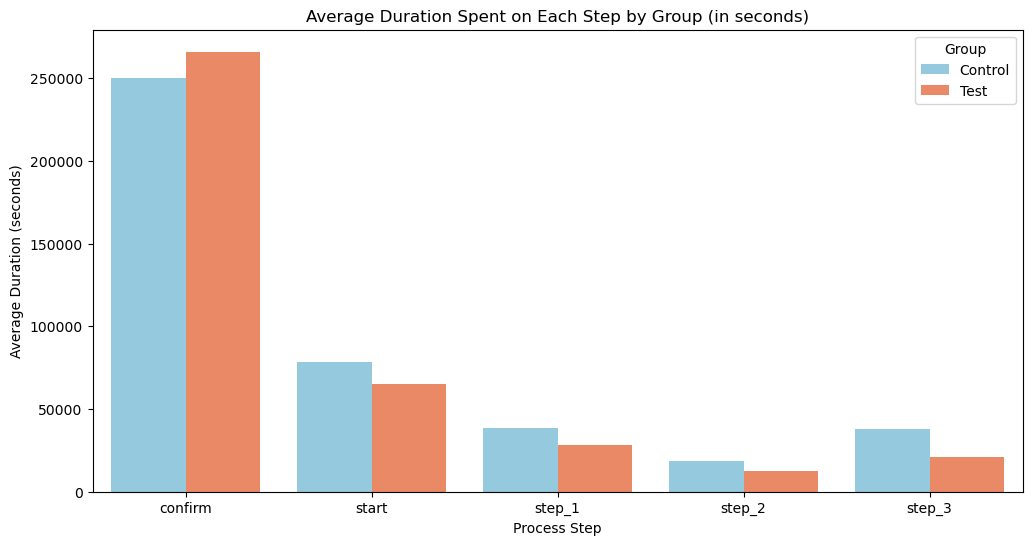

In [161]:
# Combine both dataframes
combined_df = pd.concat([average_duration_per_step_control, average_duration_per_step_test])

# Plotting
plt.figure(figsize=(12, 6))

# Create separate palettes for control and test groups
palette = {'Control': 'skyblue', 'Test': 'coral'}

# Create a bar plot using Seaborn
sns.barplot(x='process_step', y='avg_duration_seconds', hue='Group', data=combined_df, palette=palette)

# Set plot title and labels
plt.title('Average Duration Spent on Each Step by Group (in seconds)')
plt.xlabel('Process Step')
plt.ylabel('Average Duration (seconds)')

# Show plot
plt.show()

<Figure size 1200x800 with 0 Axes>

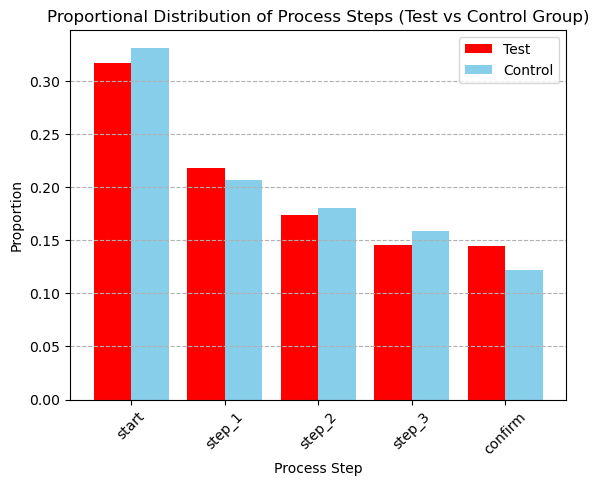

In [80]:
# Assuming you have DataFrames `test_df` and `control_df` with a column 'process_step'

# Count the occurrences of each unique value in the 'process_step' column for both DataFrames
process_step_counts_test = test_df['process_step'].value_counts().rename('Test')
process_step_counts_control = control_df['process_step'].value_counts().rename('Control')

# Normalize the counts by the total number of entries in each group
total_test = len(test_df)
total_control = len(control_df)

normalized_test_counts = process_step_counts_test / total_test
normalized_control_counts = process_step_counts_control / total_control

# Combine the normalized counts into a single DataFrame
combined_counts = pd.concat([normalized_test_counts, normalized_control_counts], axis=1).fillna(0)

# Plot a bar chart
plt.figure(figsize=(12, 8))
combined_counts.plot(kind='bar', color=['red', 'skyblue'], width=0.8)
plt.title('Proportional Distribution of Process Steps (Test vs Control Group)')
plt.xlabel('Process Step')
plt.ylabel('Proportion')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')

# Display the plot
plt.show()

**Error Rates**

#Sort the data by client_id, visit_id, and date_time to trace the users’ navigation sequence accurately.

In [82]:
# Sort data by client_id, visit_id, and date_time
variation_df = variation_df.sort_values(by=['client_id', 'visitor_id', 'date_time'])


#Convert time_period to a numeric type: We need to convert time_period to a numeric type if it's not already one, and ensure prev_step is also numeric.

In [83]:
# Ensure 'time_period' is numeric
variation_df['time_period'] = pd.to_numeric(variation_df['time_period'], errors='coerce')

Determine the frequency of backward navigations for each user in both control and test groups.
Compare the error rates between the two groups to assess if the new UI design reduces or increases errors.

Creating prev_step:

Operation: df.groupby(['client_id', 'visitor_id'])['time_period'].shift(1)
Purpose: This groups the data by client_id and visitor_id, then shifts the time_period column by one position to get the previous step for each user session.
Result: A new column prev_step that shows the previous time_period for each step.

Calculating is_backward:

Operation: df.apply(lambda row: row['time_period'] < row['prev_step'] if pd.notnull(row['prev_step']) else False, axis=1)
Purpose: For each row, compare the current time_period with prev_step. If prev_step is not NaN, check if the current time_period is less than prev_step, indicating a backward navigation. If prev_step is NaN, set is_backward to False.

Result: A new column is_backward that is True if a backward navigation occurred, otherwise False.

In [84]:
#variation_df[['client_id', 'visitor_id', 'visit_id', 'date_time', 'prev_step','Variation', 'is_backward','process_step','step_index','prev_step_index', 'is_back_track']].head(20)

In [85]:
#variation_df['is_back_track'].value_counts()

In [86]:
# Create the new column with the mapped values
mapping = { 'start': 0, 'step_1': 1, 'step_2': 2, 'step_3': 3, 'confirm': 4 } 
variation_df['step_index'] = variation_df['process_step'].map(mapping)

In [87]:
pd.set_option('display.max_columns', None)

In [88]:
variation_df.sort_values(by=['visit_id', 'date_time'])

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,visitor_id,visit_id,process_step,date_time,time_spent,date,time,hours,minutes,seconds,time_in_seconds,time_period,Variation,step_index
304306,3561384,4.0,56.0,59.5,U,2.0,63130.44,6.0,9.0,451664975_1722933822,100012776_37918976071_457913,confirm,2017-04-26 13:22:17,0.0,2017-04-26,13:22:17,13,22,17,48137,NaN,Test,4
304307,3561384,4.0,56.0,59.5,U,2.0,63130.44,6.0,9.0,451664975_1722933822,100012776_37918976071_457913,confirm,2017-04-26 13:23:09,52.0,2017-04-26,13:23:09,13,23,9,48189,NaN,Test,4
78003,7338123,7.0,88.0,23.5,M,2.0,26436.73,6.0,9.0,612065484_94198474375,100019538_17884295066_43909,start,2017-04-09 16:20:56,0.0,2017-04-09,16:20:56,16,20,56,58856,NaN,Test,0
78004,7338123,7.0,88.0,23.5,M,2.0,26436.73,6.0,9.0,612065484_94198474375,100019538_17884295066_43909,step_1,2017-04-09 16:21:12,16.0,2017-04-09,16:21:12,16,21,12,58872,NaN,Test,1
78005,7338123,7.0,88.0,23.5,M,2.0,26436.73,6.0,9.0,612065484_94198474375,100019538_17884295066_43909,step_2,2017-04-09 16:21:21,9.0,2017-04-09,16:21:21,16,21,21,58881,NaN,Test,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198750,6627522,18.0,227.0,58.0,F,2.0,1056775.54,6.0,9.0,730634087_44272418812,999988789_76411676596_272843,start,2017-04-21 23:49:11,0.0,2017-04-21,23:49:11,23,49,11,85751,NaN,Test,0
198751,6627522,18.0,227.0,58.0,F,2.0,1056775.54,6.0,9.0,730634087_44272418812,999988789_76411676596_272843,step_1,2017-04-21 23:49:22,11.0,2017-04-21,23:49:22,23,49,22,85762,NaN,Test,1
198752,6627522,18.0,227.0,58.0,F,2.0,1056775.54,6.0,9.0,730634087_44272418812,999988789_76411676596_272843,step_2,2017-04-21 23:50:16,54.0,2017-04-21,23:50:16,23,50,16,85816,NaN,Test,2
198753,6627522,18.0,227.0,58.0,F,2.0,1056775.54,6.0,9.0,730634087_44272418812,999988789_76411676596_272843,step_1,2017-04-21 23:51:00,44.0,2017-04-21,23:51:00,23,51,0,85860,NaN,Test,1


In [89]:
pd.set_option('display.max_columns', None)

In [90]:
variation_df['prev_step_index'] = variation_df.groupby('visit_id')['step_index'].shift(1)


In [91]:
# Function to detect backward navigation
variation_df['is_back_track'] = variation_df['prev_step_index'] > variation_df['step_index'] 

Calculated error rates by grouping the data by the variation column and computing the mean of the is_backward column.

In [92]:
# Calculate error rates
error_rates = variation_df.groupby('Variation')['is_back_track'].mean()

print("Error Rates:")
print(error_rates)

Error Rates:
Variation
Control    0.067702
Test       0.091936
Name: is_back_track, dtype: float64


Perform statistical tests (e.g., chi-square test) to determine if the difference in error rates between the control and test groups is statistically significant.

In [93]:
# Statistical analysis (e.g., chi-square test)
# Create a contingency table
contingency_table = pd.crosstab(variation_df['Variation'], variation_df['is_back_track'])

chi2, p, dof, ex = chi2_contingency(contingency_table)

print(f"Chi-Square Test:\nChi2: {chi2}\np-value: {p}")

Chi-Square Test:
Chi2: 625.1144708652691
p-value: 5.77278882390317e-138


In [94]:
variation_df

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,visitor_id,visit_id,process_step,date_time,time_spent,date,time,hours,minutes,seconds,time_in_seconds,time_period,Variation,step_index,prev_step_index,is_back_track
255392,555,3.0,46.0,29.5,U,2.0,25454.66,2.0,6.0,402506806_56087378777,637149525_38041617439_716659,start,2017-04-15 12:57:56,0.0,2017-04-15,12:57:56,12,57,56,46676,NaN,Test,0,NaN,False
255393,555,3.0,46.0,29.5,U,2.0,25454.66,2.0,6.0,402506806_56087378777,637149525_38041617439_716659,step_1,2017-04-15 12:58:03,7.0,2017-04-15,12:58:03,12,58,3,46683,NaN,Test,1,0.0,False
255394,555,3.0,46.0,29.5,U,2.0,25454.66,2.0,6.0,402506806_56087378777,637149525_38041617439_716659,step_2,2017-04-15 12:58:35,32.0,2017-04-15,12:58:35,12,58,35,46715,NaN,Test,2,1.0,False
255395,555,3.0,46.0,29.5,U,2.0,25454.66,2.0,6.0,402506806_56087378777,637149525_38041617439_716659,step_3,2017-04-15 13:00:14,99.0,2017-04-15,13:00:14,13,0,14,46814,NaN,Test,3,2.0,False
255396,555,3.0,46.0,29.5,U,2.0,25454.66,2.0,6.0,402506806_56087378777,637149525_38041617439_716659,confirm,2017-04-15 13:00:34,20.0,2017-04-15,13:00:34,13,0,34,46834,NaN,Test,4,3.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310088,9999729,10.0,124.0,31.0,F,3.0,107059.74,6.0,9.0,843385170_36953471821,493310979_9209676464_421146,step_1,2017-04-20 14:22:49,82.0,2017-04-20,14:22:49,14,22,49,51769,NaN,Test,1,0.0,False
310089,9999729,10.0,124.0,31.0,F,3.0,107059.74,6.0,9.0,843385170_36953471821,493310979_9209676464_421146,step_2,2017-04-20 14:27:36,287.0,2017-04-20,14:27:36,14,27,36,52056,NaN,Test,2,1.0,False
310090,9999729,10.0,124.0,31.0,F,3.0,107059.74,6.0,9.0,843385170_36953471821,493310979_9209676464_421146,start,2017-04-20 14:28:57,81.0,2017-04-20,14:28:57,14,28,57,52137,NaN,Test,0,2.0,True
51308,9999832,23.0,281.0,49.0,F,2.0,431887.61,1.0,4.0,145538019_54444341400,472154369_16714624241_585315,start,2017-05-16 16:46:03,0.0,2017-05-16,16:46:03,16,46,3,60363,NaN,Test,0,NaN,False


Analyze error rates by different segments (e.g., client tenure, age, gender, number of accounts, balance) to identify if specific groups are more prone to errors.
This can help tailor future improvements or targeted interventions for specific client segments.

In [95]:
# Segmentation analysis (example by client tenure)
segmentation_analysis = variation_df.groupby(['Variation', 'clnt_tenure_yr'])['is_back_track'].mean().unstack()
print("Segmentation Analysis by Client Tenure:")
print(segmentation_analysis)

Segmentation Analysis by Client Tenure:
clnt_tenure_yr      2.0       3.0       4.0       5.0       6.0       7.0   \
Variation                                                                    
Control         0.057416  0.069573  0.069301  0.076487  0.070567  0.065222   
Test            0.039801  0.083627  0.088052  0.084065  0.087402  0.092340   

clnt_tenure_yr      8.0       9.0       10.0      11.0      12.0      13.0  \
Variation                                                                    
Control         0.065882  0.064435  0.063451  0.066576  0.063390  0.062864   
Test            0.088747  0.087270  0.095838  0.089781  0.094246  0.087981   

clnt_tenure_yr      14.0      15.0      16.0      17.0      18.0      19.0  \
Variation                                                                    
Control         0.065863  0.065296  0.062255  0.059502  0.068606  0.070837   
Test            0.095911  0.092320  0.096836  0.094548  0.096445  0.114081   

clnt_tenure_yr      2

This approach will help you understand how the new UI affects user behavior, specifically focusing on error rates indicated by backward navigation. The analysis will also provide insights into which segments of users are most affected, enabling more targeted improvements.

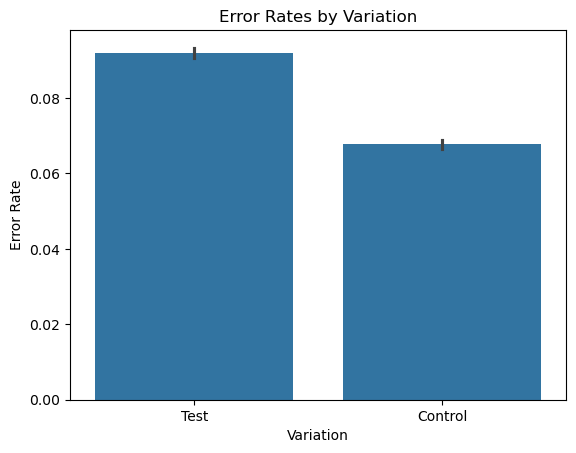

In [96]:
# Visualization 
sns.barplot(x='Variation', y='is_back_track', data=variation_df)
plt.title('Error Rates by Variation')
plt.xlabel('Variation')
plt.ylabel('Error Rate')
plt.show()

Compute the Time Spent on Each Step: Calculate the difference between the timestamps of consecutive steps for each user session.
Aggregate the Time Spent by Step: Average these durations for each step across all user sessions.

Create next_step_time: Use shift(-1) to get the timestamp of the next step within each user session.
Calculate time_spent: Find the difference between next_step_time and date_time, then convert this to seconds.

Drop Rows with NaN time_spent:
Remove rows where time_spent is NaN, which would occur for the last step of each session since there is no next step to compare.
Calculate Average Duration:

Group by process_step and compute the mean of time_spent for each step.
Reset the index and rename columns for clarity.

In [99]:
variation_df.to_csv('variation.csv', index=False)